In [118]:
import numpy as np
import matplotlib.pyplot as plt 
%config InlineBackend.figure_format = "retina"

In [119]:
# data for PL
betas_1 = np.array([1/4,-1/2,1/3,2,0,3])
gammas_1 = np.array([-2,-1,0,-2,-1/4,-4])
betas_2 = np.array([3/2,1,-1,4,-2,0])
gammas_2 = np.array([0,2,1,-1,1,2])

X_bound = 5.0

In [120]:
# funs
def F(u,eta):
    return np.min(u**2/2 + eta - u*betas_2 - gammas_2)

def f(u):
    return F(u,np.max(betas_1*u+gammas_1))

def model(u,H=np.arange(len(betas_2)),S=np.arange(len(betas_1))):
    eta = np.max(betas_1[S]*u+gammas_1[S])
    return np.min(u**2/2 + eta - u*betas_2[H] - gammas_2[H])

In [121]:
''' 
displays upper-models {i}/[m] for every i in list_i
displays lower-models [n]/S for every S in list_S
'''

us = np.linspace(-8,8,600)
values_f = np.array([f(u) for u in us])
colors_upper_models = ['tab:blue','tab:brown']
colors_lower_models = ['tab:green']


def plotter(list_i,list_S,iter_counter=0,str_name='image_1_2_upper'):

    fig,ax = plt.subplots(figsize=(6,6))
    plt.grid()
    plt.xlabel('$u$',fontsize=17)
    plt.ylabel('values',fontsize=17)
    plt.title('ULO - visualization | iter. k = '+str(iter_counter))
    ax.set_box_aspect(1)

    plt.plot(us,values_f,color='black',label='F')
    y_lim_up = 5/2
    y_lim_down = min(values_f)

    for idi,i in enumerate(list_i):
        values_upper = np.array([model(u,[i]) for u in us])
        arg_min_upper = us[np.argmin(values_upper)]
        y_lim_down = min(y_lim_down,min(values_upper))
        plt.plot(us,values_upper,color=colors_upper_models[idi],linestyle='--',\
                 label='$F^{(\\{'+str(i+1)+'\\},['+str(len(betas_1))+'])}$')
        plt.scatter([arg_min_upper],[np.min(values_upper)],color=colors_upper_models[idi],marker='*',s=70)

    for idS,S_elem in enumerate(list_S):
        if len(S_elem)>0:
            values_lower = np.array([model(u,S=S_elem) for u in us])
            arg_min_lower = us[np.argmin(values_lower)]
            y_lim_down = min(y_lim_down,min(values_lower))
            str_equiv = ''
            S_elem = np.sort(S_elem)
            for j in S_elem:
                str_equiv += str(j+1)+','
            plt.plot(us,values_lower,color=colors_lower_models[idS],linestyle='--',\
                     label='$F^{(['+str(len(betas_2))+'],\\{'+str_equiv[:-1]+'\\})}$')
            plt.scatter([arg_min_lower],[np.min(values_lower)],color=colors_lower_models[idS],marker='*',s=70)

    # boundaries 
    plt.plot([X_bound,X_bound],[-20,20],color='tab:red')
    plt.plot([-X_bound,-X_bound],[-20,20],color='tab:red',label='$\\mathcal{U}$ bnd.')
    plt.legend(fontsize=15,loc='center left')

    plt.ylim([y_lim_down*(1-0.1*np.sign(y_lim_down)),y_lim_up])
    plt.savefig(str_name+'.pdf',dpi=300)

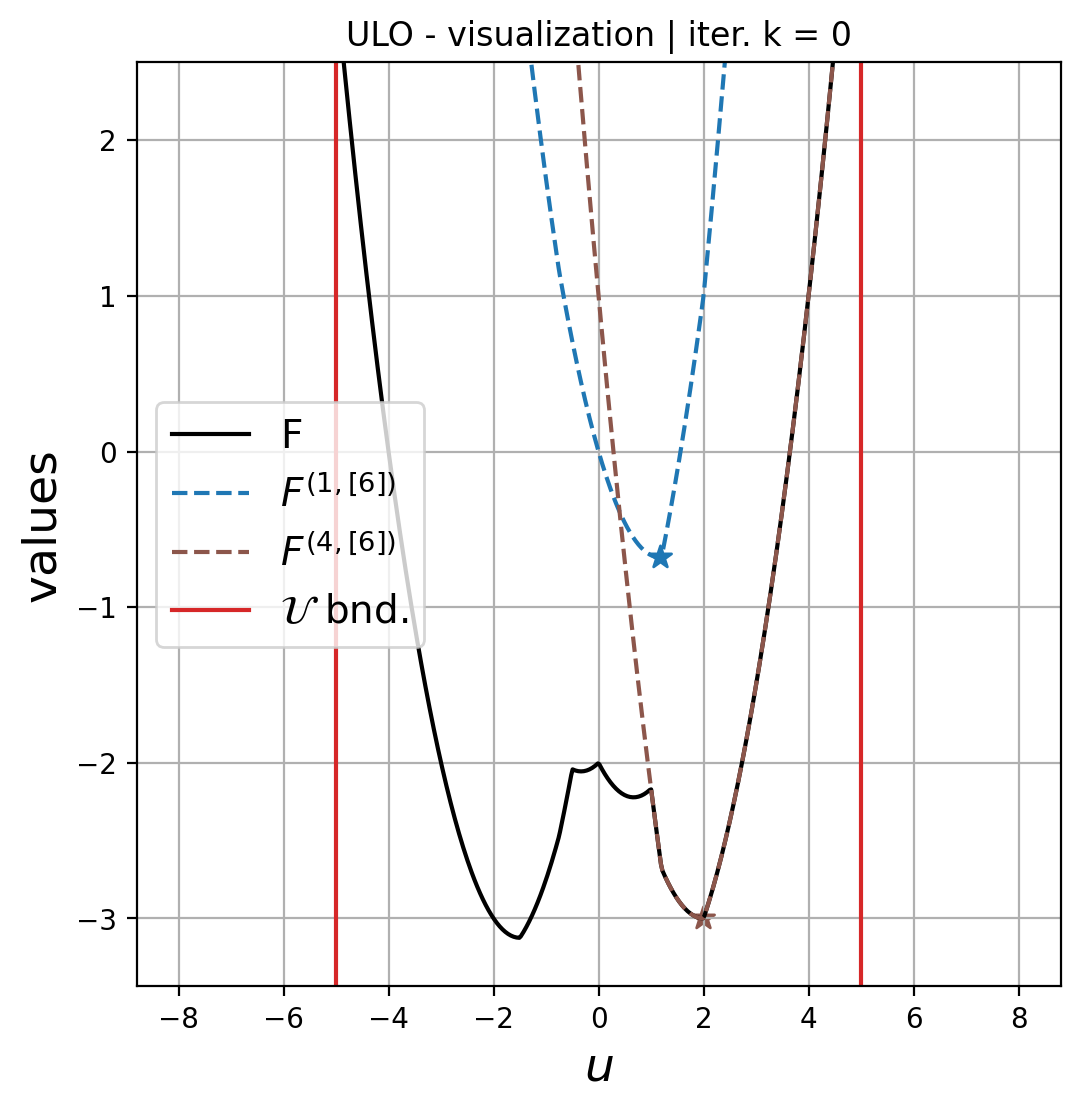

In [122]:
# first iter phase (a)
plotter([0,3],[[]],iter_counter=0,str_name='image_1_2_upper')

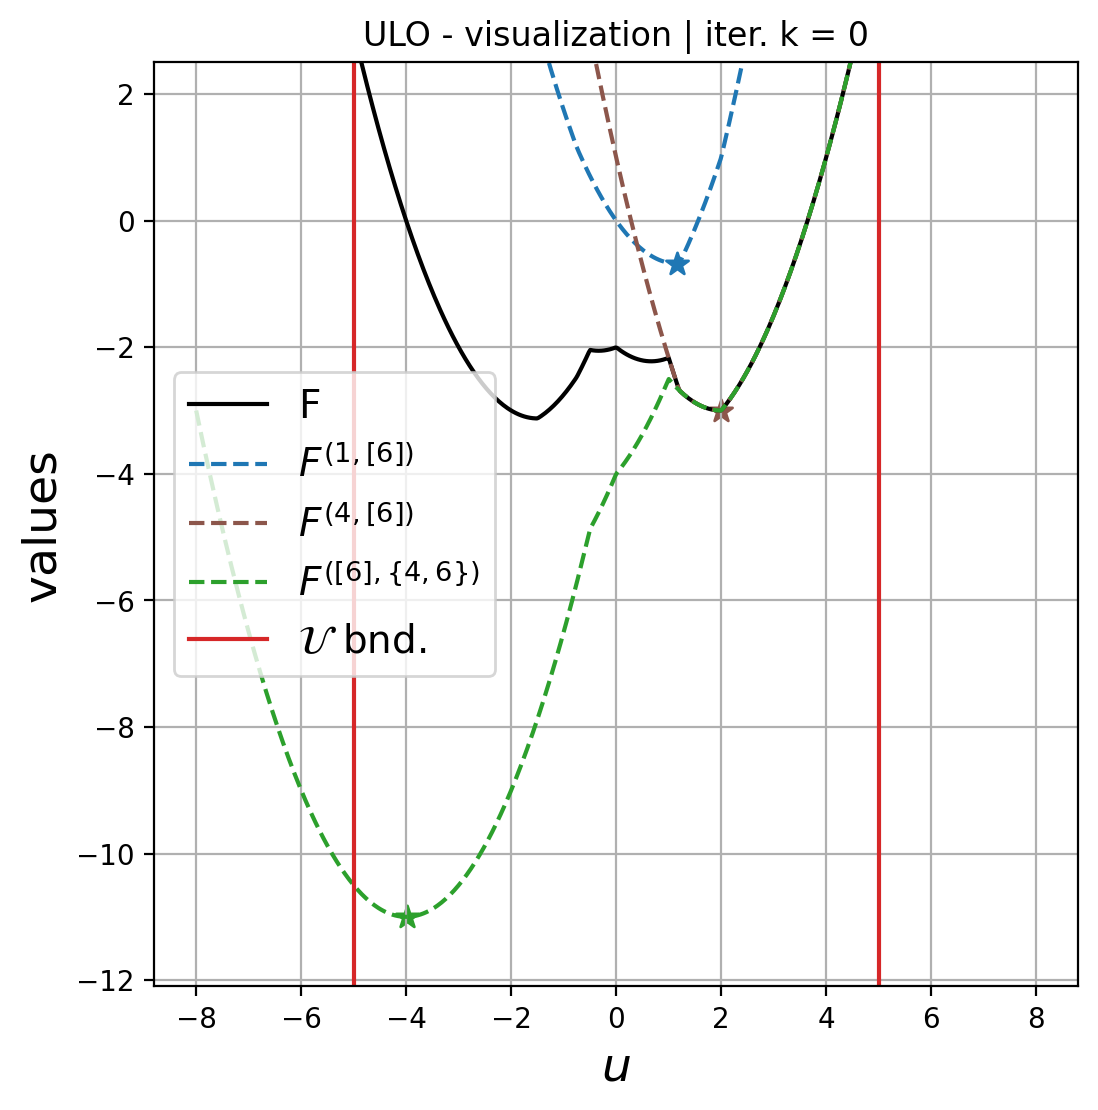

In [123]:
# first iter phase (b)
plotter([0,3],[[3,5]],iter_counter=0,str_name='image_1_1_lower')

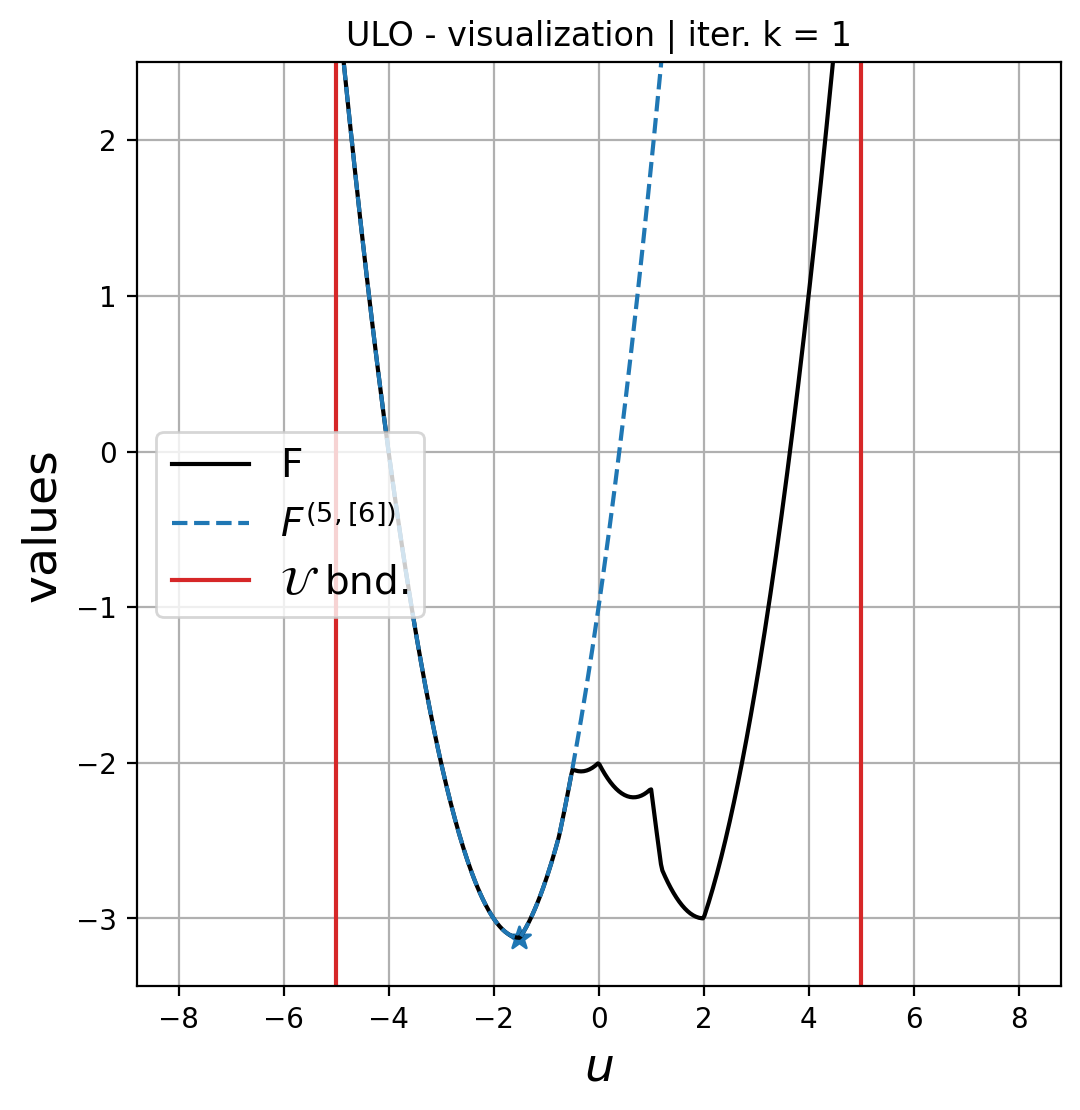

In [124]:
# second iter phase (a)
plotter([4],[[]],iter_counter=1,str_name='image_2_1_upper')

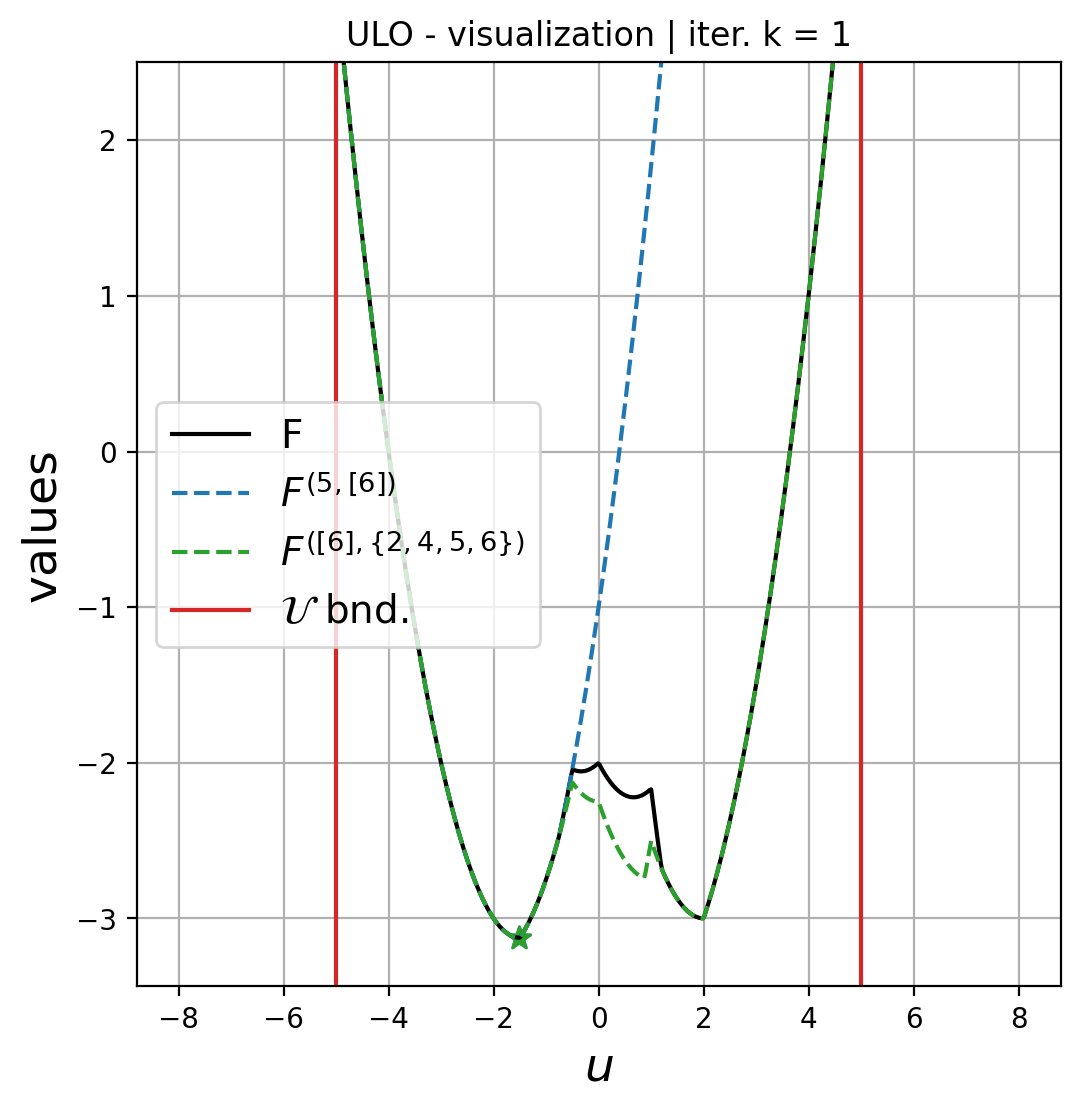

In [125]:
# second iter phase (b)
plotter([4],[[3,5,1,4]],iter_counter=1,str_name='image_2_1_lower')